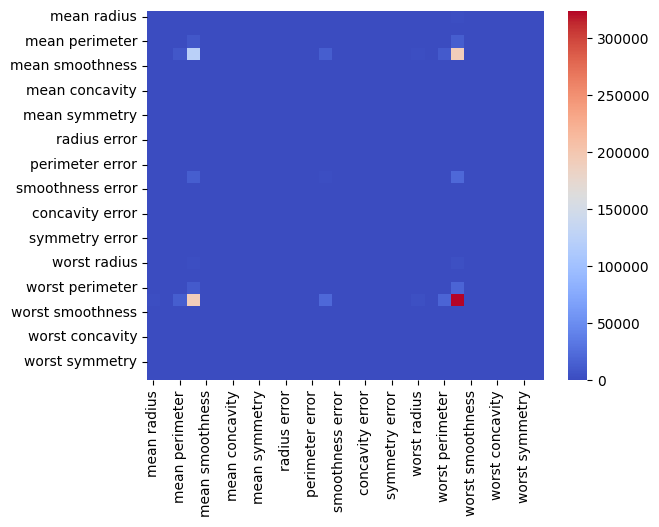

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
cov_matrix = df.cov()
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.show()

step 3

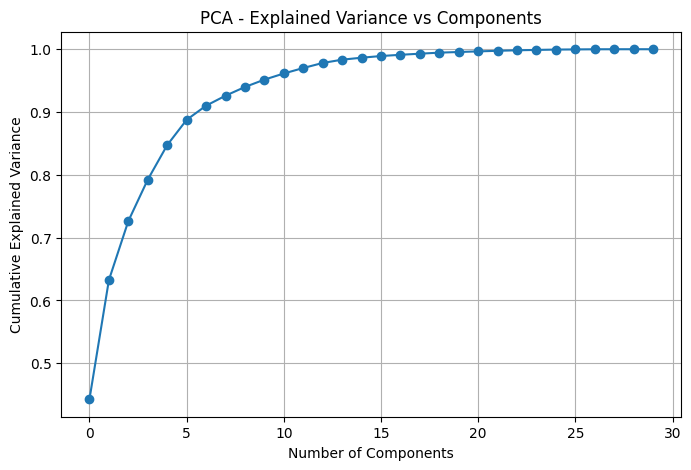

In [3]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(n_components)])
df_svd = pd.DataFrame(X_svd, columns=[f"SVD_{i+1}" for i in range(n_components)])
df_ica = pd.DataFrame(X_ica, columns=[f"ICA_{i+1}" for i in range(n_components)])
df_pca.head()
df_svd.head()
df_ica.head()

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Components')
plt.grid(True)
plt.show()

step 4

In [10]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression , RFE
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
target = data.target

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, target)
selected_feature_indices = selector.get_support(indices=True)
df_selected_best = pd.DataFrame(X_selected, columns=selected_feature_indices)
df_selected_best.head()

selector = RFE(estimator=LogisticRegression(max_iter=5000, solver='liblinear'), n_features_to_select=10)
X_selected = selector.fit_transform(X, target)
selected_feature_indices = selector.get_support(indices=True)
df_selected_rfe = pd.DataFrame(X_selected, columns=selected_feature_indices)
df_selected_rfe.head()


,0,6,7,8,20,24,26,27,28,29
0,17.99,0.3001,0.14710,0.2419,25.38,0.1622,0.7119,0.2654,0.4601,0.11890
1,20.57,0.0869,0.07017,0.1812,24.99,0.1238,0.2416,0.1860,0.2750,0.08902
2,19.69,0.1974,0.12790,0.2069,23.57,0.1444,0.4504,0.2430,0.3613,0.08758
3,11.42,0.2414,0.10520,0.2597,14.91,0.2098,0.6869,0.2575,0.6638,0.17300
4,20.29,0.1980,0.10430,0.1809,22.54,0.1374,0.4000,0.1625,0.2364,0.07678


step 5